### What is Simple Linear Regression?

Author: Asad Raza Virk

Date: 2024-10-27

Twitter: [@virkat](https://twitter.com/virkat)


**Simple Linear Regression** is a type of machine learning algorithm used for **predicting a continuous value** based on the relationship between a dependent variable (output) and an independent variable (input). It is one of the simplest and most commonly used regression algorithms.

### How Does Simple Linear Regression Work?

1. **Finding the Best Fit Line**:

   - Linear regression tries to find a straight line that best represents the relationship between the input (independent variable) and the output (dependent variable).
   - This line is called the **regression line** and is represented by the equation:
     
     **y = m * x + c**
     
     Where **y** is the predicted value, **m** is the slope of the line, **x** is the input value, and **c** is the intercept (the point where the line crosses the y-axis).

2. **Minimizing the Error**:

   - The goal is to find the values for **m** (slope) and **c** (intercept) that minimize the difference between the predicted values and the actual values. This difference is called the **error**.
   - We use a method called **Ordinary Least Squares (OLS)** to minimize the **sum of squared errors**.

### Visualizing Simple Linear Regression

To help visualize how linear regression works, we can animate the process of finding the best fit line. Below is an example of how you can create a GIF that shows the line being updated over time to fit the data points.

We will use the **tips dataset** from the `seaborn` library, which contains data about tips given at a restaurant, such as total bill, tip amount, and more. In this example, we'll use the **total bill** to predict the **tip amount**.




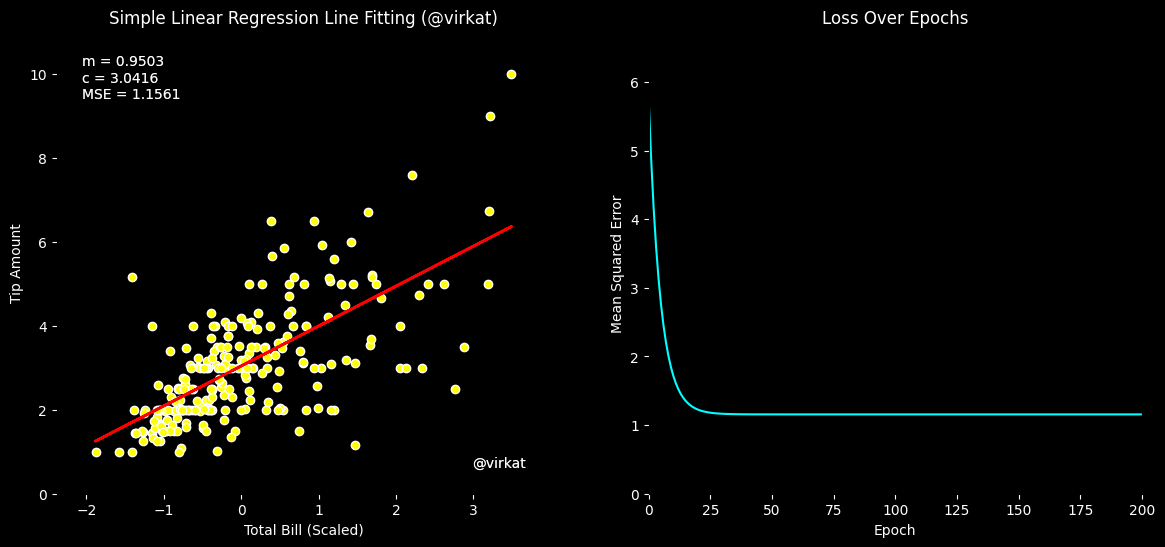

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the tips dataset
data = sns.load_dataset('tips')
X = data['total_bill'].values.reshape(-1, 1)
y = data['tip'].values.reshape(-1, 1)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters with small random values
m = np.random.rand()
c = np.random.rand()
learning_rate = 0.05  # Moderate learning rate for better convergence
epochs = 200  # Reduced epochs for faster execution

# Setting up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('black')  # Set figure background to black
ax1.set_facecolor('black')  # Set axis background to black
ax2.set_facecolor('black')

ax1.set_xlim(X.min() - 0.5, X.max() + 0.5)
ax1.set_ylim(y.min() - 1, y.max() + 1)
scatter = ax1.scatter(X, y, color='yellow', edgecolors='w')  # Change point color to yellow for contrast
line, = ax1.plot([], [], color='red', linewidth=2)
ax1.set_xlabel('Total Bill (Scaled)', color='white')
ax1.set_ylabel('Tip Amount', color='white')
ax1.set_title('Simple Linear Regression Line Fitting (@virkat)', color='white')
ax1.tick_params(colors='white')  # Set tick color to white

ax2.set_xlabel('Epoch', color='white')
ax2.set_ylabel('Mean Squared Error', color='white')
ax2.set_title('Loss Over Epochs', color='white')
ax2.tick_params(colors='white')
loss_values = []
loss_plot, = ax2.plot([], [], color='cyan')

# Function to update the line and loss for each frame
def update(frame):
    global m, c
    # Calculate predictions
    y_pred = m * X_train + c
    # Calculate gradients
    m_gradient = (-2 / len(X_train)) * np.sum(X_train * (y_train - y_pred))
    c_gradient = (-2 / len(X_train)) * np.sum(y_train - y_pred)
    # Update parameters
    m -= learning_rate * m_gradient
    c -= learning_rate * c_gradient

    # Calculate loss (Mean Squared Error)
    mse = np.mean((y_train - y_pred) ** 2)
    loss_values.append(mse)

    # Update the line
    y_line = m * X + c
    line.set_data(X, y_line)

    # Update loss plot
    loss_plot.set_data(range(len(loss_values)), loss_values)
    ax2.set_xlim(0, epochs)
    ax2.set_ylim(0, max(loss_values) + 1)

    # Add text for m, c, and mse values on the plot
    ax1.text(0.05, 0.95, f"m = {m:.4f}\nc = {c:.4f}\nMSE = {mse:.4f}", transform=ax1.transAxes, fontsize=10, color='white', verticalalignment='top', bbox=dict(facecolor='black', alpha=0.5))

    # Add Twitter handle on the bottom right corner
    ax1.text(0.95, 0.05, '@virkat', transform=ax1.transAxes, fontsize=10, color='white', verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='black', alpha=0.5))

    return line, loss_plot

# Create the animation
ani = FuncAnimation(fig, update, frames=epochs, repeat=False)

# Save the animation as a gif
ani.save('simple_linear_regression_tips_with_loss.gif', writer=PillowWriter(fps=10))
